# Analyze the Media Sentiment from Predictions

Analyze the sentiment from the predictions made with predict_sentiment.ipynb, paying attention to negative sentiment as possiblee indicator of greenwashing: <br>

1. Replace in `df_pred['sentiment']` the numbers of the prediction with the correct `string` mapping of the sentiment, e. g. `1` has the value `neutral`. 
2. Sum up the `relevant` column of the data frame, get the total of the tweets and then calculate the percentage of the relevant tweets. 
3. Use the `groupby` function to sum up `['channel','sentiment']`. 
4. Complete the loop of the function below, so that we locate (`loc`), the `sentiment` that is == to the loops index and the `data[company] == 1`. 
5. Access the negative tweet of the dataframe above which is on the $4^{th}$ index of the dataframe. And then access the link of the tweet to validate that you can access the actual article about that negative news on the internet. 

In [5]:
# standard imports
import pandas as pd
#import gdown

# plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')


# Get the prerdiction data

In [6]:
PATH = 'data/'

In [7]:
# load the sentiment prediction data generated in predict_sentiment.ipynb notebook
df = pd.read_csv(PATH + 'results_df.csv')
df.head()

,tweet,channel,apple,tesla,google,meta,input_ids,attention_mask,sentiment
0,Adidas Headphones Announces Self-Charging Wire...,forbes,0,0,0,0,[ 0 9167 19926 3928 15797 3921 24744 121...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,1
1,Apple’s Coolest New iPhone Feature Just Got Be...,forbes,1,0,0,0,[ 0 20770 17 27 29 12487 990 1...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,2
2,The Hidden Power Of Samsung’s New Foldable Gal...,forbes,0,0,0,0,[ 0 133 26234 3029 1525 3797 17 ...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,1
3,AI Ethics And The Geopolitical Wrestling Match...,forbes,0,0,0,0,[ 0 15238 20138 178 20 4177 1517 371...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,1
4,Qualcomm AI Research Innovates 3D Perception T...,forbes,0,0,0,0,[ 0 42170 24302 4687 1624 20067 1626 1...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...,1


In [9]:
df_pred = df[['channel', 'apple', 'tesla','google', 'meta', 'sentiment']]
df_pred.head()

,channel,apple,tesla,google,meta,sentiment
0,forbes,0,0,0,0,1
1,forbes,1,0,0,0,2
2,forbes,0,0,0,0,1
3,forbes,0,0,0,0,1
4,forbes,0,0,0,0,1


Replace in `df_pred['sentiment']` the numbers of the prediction with the correct `string` mapping of the sentiment, e. g. `1` has the value `neutral`. 

In [10]:
df_pred['sentiment'].replace({1:'neutral', 2:'positive', 0:'negative'},inplace=True)
df_pred.head()

,channel,apple,tesla,google,meta,sentiment
0,forbes,0,0,0,0,neutral
1,forbes,1,0,0,0,positive
2,forbes,0,0,0,0,neutral
3,forbes,0,0,0,0,neutral
4,forbes,0,0,0,0,neutral


In [11]:
# sum across columns only numeric columns 
df_pred['relevant'] = df_pred.sum(axis=1, numeric_only=True)

df_pred.head()

,channel,apple,tesla,google,meta,sentiment,relevant
0,forbes,0,0,0,0,neutral,0
1,forbes,1,0,0,0,positive,1
2,forbes,0,0,0,0,neutral,0
3,forbes,0,0,0,0,neutral,0
4,forbes,0,0,0,0,neutral,0


# Analyze Tweets

Sum up the `relevant` column of the data frame, get the total of the tweets and then calculate the percentage of the relevant tweets. 

In [12]:
print(f"total number of relevant tweets: {df_pred['relevant'].sum()}")
print(f"number of relevant tweets per company\n{df_pred[['apple', 'tesla', 'google', 'meta']].sum()}")
print(f"total number of tweets: {df_pred.shape[0]}")
print(f"percent of relevant tweets: {df_pred['relevant'].sum()/df_pred.shape[0]*100:.2f}%")

total number of relevant tweets: 69
number of relevant tweets per company
apple     34
tesla      8
google    17
meta      10
dtype: int64
total number of tweets: 1138
percent of relevant tweets: 6.06%


In [13]:
num_relevant = df_pred['relevant'].sum()
num_total = df_pred.shape[0]
print(f"Number of relevant tweets: {num_relevant}")
print(f"Total number of tweets: {num_total}")
print(f"Percent of relevant tweets: {num_relevant/num_total*100:.2f}%")

Number of relevant tweets: 69
Total number of tweets: 1138
Percent of relevant tweets: 6.06%


In [14]:
channel_stats = pd.DataFrame({
    'relevant': df_pred.groupby('channel').relevant.sum().astype(int),
    'total': df_pred.groupby('channel').size()
})
channel_stats['percentage_relevant'] = (
    100*channel_stats.relevant/channel_stats.total).round(2)
channel_stats.sort_values('percentage_relevant', ascending=False)

,relevant,total,percentage_relevant
channel,,,
forbes,13,60,21.67
bloomberg,19,178,10.67
BLaw,23,460,5.00
wired,14,440,3.18


Use the `groupby` function to sum up `['channel','sentiment']`. 

In [15]:
df_pred.groupby(['channel', 'sentiment']).sum()

apple  tesla  google  meta  relevant
channel   sentiment                                      
BLaw      negative       5      0       4     3        12
          neutral        5      3       2     1        11
          positive       0      0       0     0         0
bloomberg negative       1      0       0     0         1
          neutral        6      3       3     3        15
          positive       2      0       1     0         3
forbes    negative       1      0       2     0         3
          neutral        3      2       0     0         5
          positive       5      0       0     0         5
wired     negative       1      0       1     1         3
          neutral        2      0       3     2         7
          positive       3      0       1     0         4

## Plot Amount of Relevant Tweets 

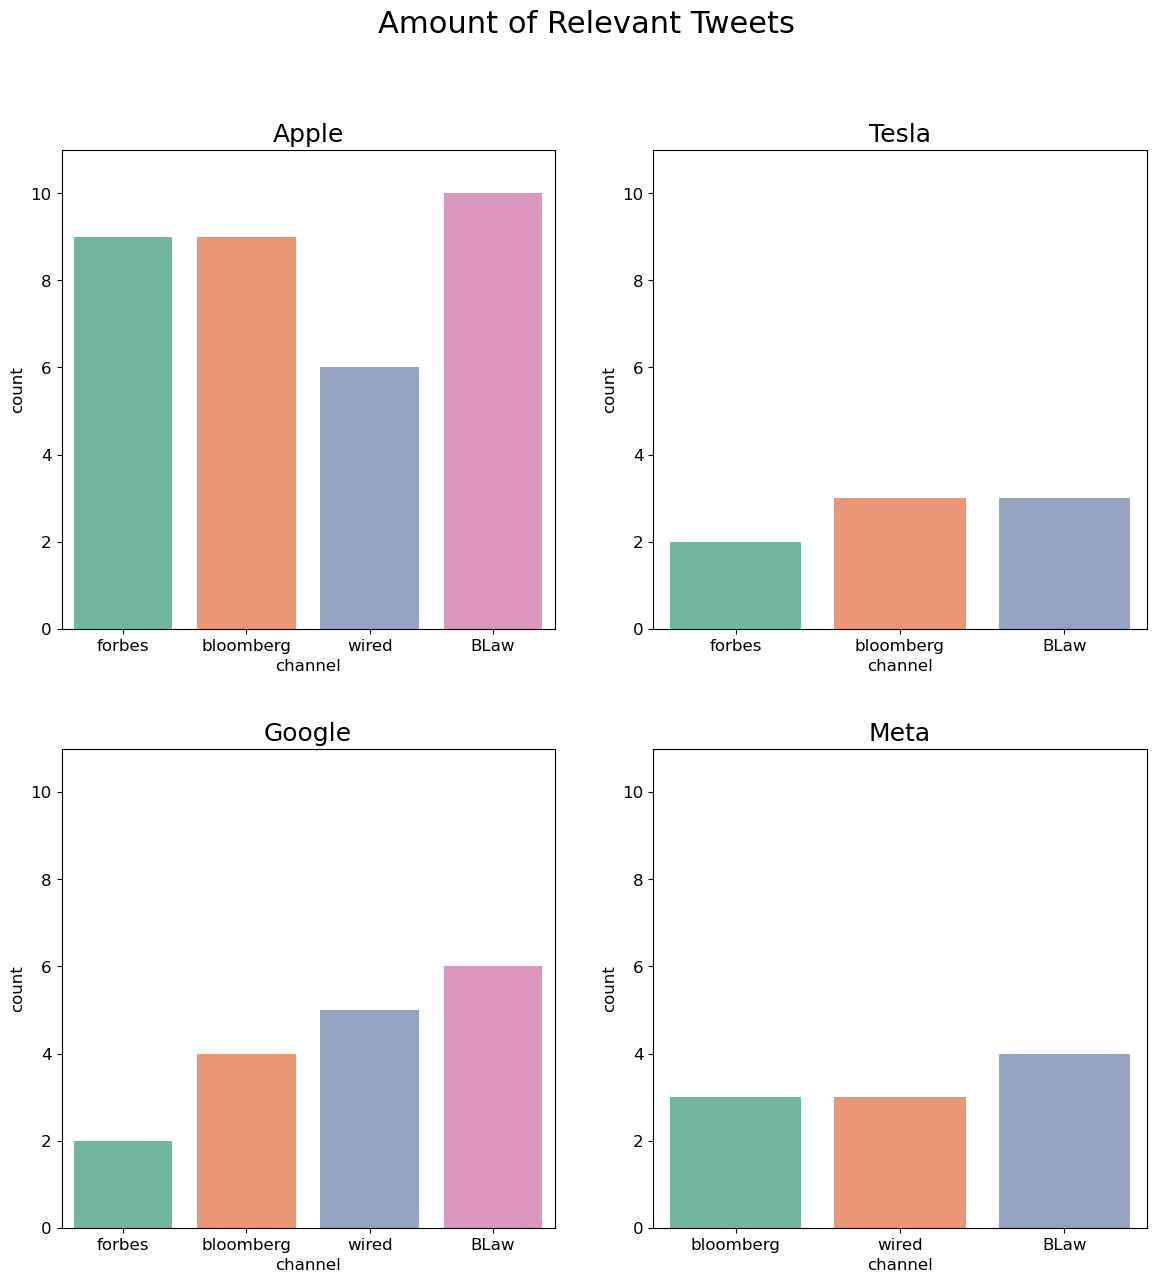

In [17]:
plt.rc("font", size=12)

apple = df_pred.loc[df_pred['apple'] == 1]
tesla = df_pred.loc[df_pred['tesla'] == 1]
google = df_pred.loc[df_pred['google'] == 1]
meta = df_pred.loc[df_pred['meta'] == 1]

#print(apple['channel'].value_counts())
#print(f"max number tweets from chaneel: {apple['channel'].value_counts().max()}")

# compute max values of all plots to avoid "magic numbers"
max_val_list = [apple['channel'].value_counts().max(), tesla['channel'].value_counts(
).max(), google['channel'].value_counts().max(), meta['channel'].value_counts().max()]

# get max value
max_val = max(max_val_list) + 1

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
axes[0, 0].set_ylim(0, max_val)
axes[0, 1].set_ylim(0, max_val)
axes[1, 0].set_ylim(0, max_val)
axes[1, 1].set_ylim(0, max_val)
sns.countplot(x='channel', data=apple,
              ax=axes[0][0], palette='Set2').set_title('Apple', fontsize=18)
sns.countplot(x='channel', data=tesla,
              ax=axes[0][1], palette='Set2').set_title('Tesla', fontsize=18)
sns.countplot(x='channel', data=google,
              ax=axes[1][0], palette='Set2').set_title('Google', fontsize=18)
sns.countplot(x='channel', data=meta, ax=axes[1][1], palette='Set2').set_title(
    'Meta', fontsize=18)

fig.suptitle('Amount of Relevant Tweets', fontsize=22)
plt.subplots_adjust(hspace=0.25)

## Plot Amount of Sentiment per Company

In [18]:
def get_company_sent(df, company): 
    df['sentiment'].replace({1:'neutral',2:'positive',0:'negative'},inplace=True)
    sent_list = list(df.sentiment.unique())
    data = df[['tweet','channel', company, 'sentiment']]
    print(data.head())
    sent = []
    # locate  the sentiment  that is equal to the loops index and the company is equal to 1
    for i in sent_list:
        # get the first value of the number of unique values in each column, of the rows choseen with boolean mask
        sent.append(data.loc[(data['sentiment'] == i) & (data[company] == 1)].nunique()[0])

    new_df = pd.DataFrame(sent, index=sent_list, columns=['value'])
    print(new_df)
    return new_df

In [48]:
get_company_sent(df, 'apple')

                                               tweet channel  apple sentiment
0  Adidas Headphones Announces Self-Charging Wire...  forbes      0   neutral
1  Apple’s Coolest New iPhone Feature Just Got Be...  forbes      1  positive
2  The Hidden Power Of Samsung’s New Foldable Gal...  forbes      0   neutral
3  AI Ethics And The Geopolitical Wrestling Match...  forbes      0   neutral
4  Qualcomm AI Research Innovates 3D Perception T...  forbes      0   neutral
          value
neutral      16
positive     10
negative      8


,value
neutral,16
positive,10
negative,8


In [20]:
names = df.iloc[:,[2,3,4,5]]
names_list = names.columns.to_list()
names_list

['apple', 'tesla', 'google', 'meta']

                                               tweet channel  apple sentiment
0  Adidas Headphones Announces Self-Charging Wire...  forbes      0   neutral
1  Apple’s Coolest New iPhone Feature Just Got Be...  forbes      1  positive
2  The Hidden Power Of Samsung’s New Foldable Gal...  forbes      0   neutral
3  AI Ethics And The Geopolitical Wrestling Match...  forbes      0   neutral
4  Qualcomm AI Research Innovates 3D Perception T...  forbes      0   neutral
          value
neutral      16
positive     10
negative      8
                                               tweet channel  tesla sentiment
0  Adidas Headphones Announces Self-Charging Wire...  forbes      0   neutral
1  Apple’s Coolest New iPhone Feature Just Got Be...  forbes      0  positive
2  The Hidden Power Of Samsung’s New Foldable Gal...  forbes      0   neutral
3  AI Ethics And The Geopolitical Wrestling Match...  forbes      0   neutral
4  Qualcomm AI Research Innovates 3D Perception T...  forbes      0   neutral


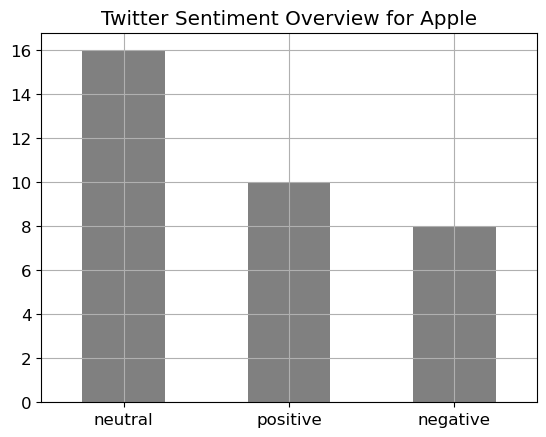

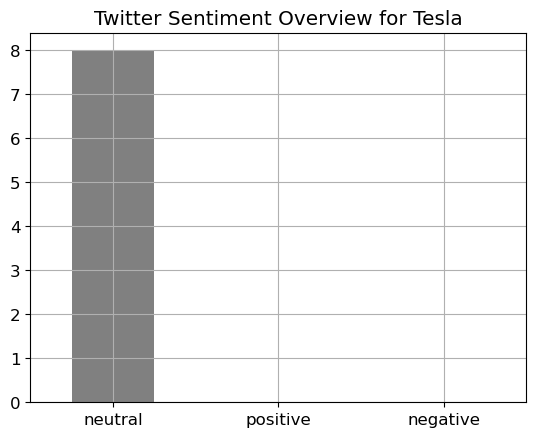

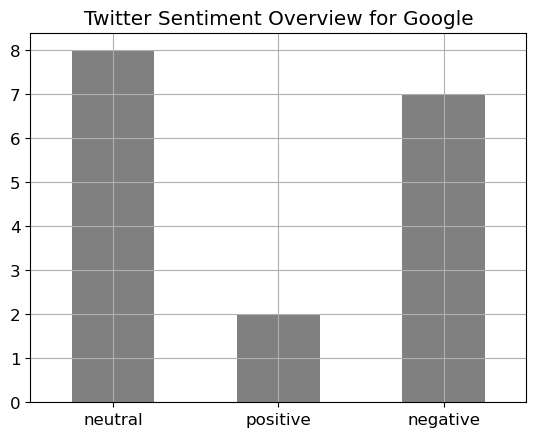

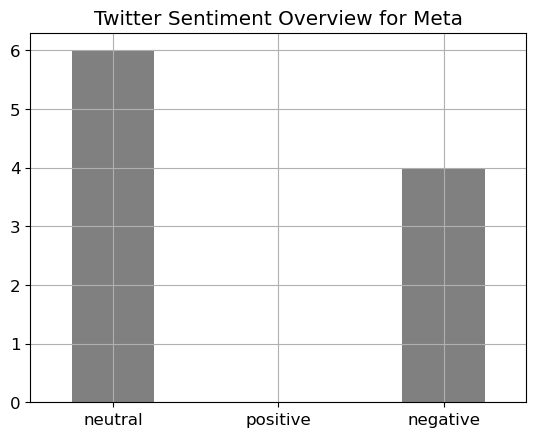

In [21]:
for name in names_list:
    plot_df = get_company_sent(df, name)
    plot_df.plot.bar(color='grey', rot=0, legend=False)
    title_name = 'Twitter Sentiment Overview for ' + name.capitalize()
    plt.title(title_name)
    plt.grid()

# Analyze Apple

In [22]:
df_apple = df[['tweet','channel', 'apple', 'sentiment']]
df_apple['sentiment'].replace({1:'neutral',2:'positive',0:'negative'},inplace=True)
df_apple

,tweet,channel,apple,sentiment
0,Adidas Headphones Announces Self-Charging Wire...,forbes,0,neutral
1,Apple’s Coolest New iPhone Feature Just Got Be...,forbes,1,positive
2,The Hidden Power Of Samsung’s New Foldable Gal...,forbes,0,neutral
3,AI Ethics And The Geopolitical Wrestling Match...,forbes,0,neutral
4,Qualcomm AI Research Innovates 3D Perception T...,forbes,0,neutral
...,...,...,...,...
1133,The EU’s “right to be forgotten” privacy law i...,BLaw,0,neutral
1134,A Texas doctor who stood on the steps of the S...,BLaw,0,negative
1135,Robinhood’s cryptocurrency arm was fined $30 m...,BLaw,0,negative
1136,Most Covid-19 patients continue to test positi...,BLaw,0,neutral


## Look at Negative Tweets

In [23]:
apple_neg = df_apple.loc[(df_apple['sentiment'] == 'negative') & (df_apple['apple'] == 1)]
apple_neg = apple_neg.reset_index(drop=True)
pd.set_option('display.max_colwidth', None)
apple_neg

,tweet,channel,apple,sentiment
0,"Apple Loop: Sneaky iPhone 14 Decision, Latest Mac Mini Delay, Google’s iMessage Fight With Apple https://t.co/d16AbjA3dP https://t.co/GyYC6fbMGP",forbes,1,negative
1,"Apple, which used to acquire a company every three or four weeks, has dramatically slowed its dealmaking in the past two years https://t.co/wydVejFHhV",bloomberg,1,negative
2,Apple’s laptops are expensive. Here's what we think you should spend your hard-earned money on. https://t.co/e96yCqrBCp,wired,1,negative
3,"An Apple AirPods patent-infringement case, deemed a mistrial soon after a California jury began deliberating, was caused by one juror’s internet research and another’s surgery on a pair of earbuds. https://t.co/x6kohhVVHS",BLaw,1,negative
4,Apple will pay $30.5 million to settle claims it didn’t pay store workers for time spent having their bags and iPhones searched at their end of the shifts. https://t.co/w9X9Yq9h8T,BLaw,1,negative
5,Apple will pay $30.5 million to settle claims it didn’t pay store workers for time spent having their bags and iPhones searched at their end of the shifts. https://t.co/yz3jjX5X7V,BLaw,1,negative
6,"A company alleged in July 2020 that Apple’s charging cases infringe four of its patents by magnetically “coupling” the earbuds to them and switching the earbuds between an active and inactive state, among other functions. https://t.co/rjOxgAXVht",BLaw,1,negative
7,"An administrative tribunal gutted a patent covering wireless earbud charging cases, handing Apple an edge in an infringement lawsuit over its AirPod and Powerbeats Pro wireless earbud charging cases. https://t.co/D4o7EccySh",BLaw,1,negative


### Access Media Article of Negative Tweet

Analyze the tweet about Apple's workforce and use the link to look at the article.

Access the negative tweet of the dataframe above which is on the $4^{th}$ index of the dataframe, access the link of the tweet to validate the negative news on the internet. 

In [24]:
apple_neg.iloc[4,:]

tweet        Apple will pay $30.5 million to settle claims it didn’t pay store workers for time spent having their bags and iPhones searched at their end of the shifts.   https://t.co/w9X9Yq9h8T
channel                                                                                                                                                                                       BLaw
apple                                                                                                                                                                                            1
sentiment                                                                                                                                                                                 negative
Name: 4, dtype: object

In [25]:
# extract the link from the tweet spliting the tweet by space and then checking if the word starts with http
link = [word for word in apple_neg.iloc[4,0].split() if word.startswith('http')]
print(f"link to the article with negative sentiment: {link}")

link to the article with negative sentiment: ['https://t.co/w9X9Yq9h8T']
